In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from bokeh.layouts import row,column,gridplot
from pyspark.sql import SparkSession
from bokeh.models import ColumnDataSource, CategoricalColorMapper, HoverTool,CustomJS,Slider, Panel, Tabs
from matplotlib.ticker import FuncFormatter
from pyspark.sql.functions import * 
from pyspark.sql.types import *
from pyspark.sql import functions as F
from bokeh.plotting import figure, output_notebook, show


#t·∫Øt nh·ªØng th√¥ng b√°o warning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

warnings.filterwarnings("ignore", category=FutureWarning)


<h2>T·∫°o SparkSession </h2>

In [2]:
# import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("SGU_Student").getOrCreate()


<h2>ƒê·ªçc file</h2>


In [3]:
#ƒê·ªçc file csv 
df = spark.read.csv('SGU.csv',header=True)


In [4]:
df.show(5)


+-------------------+----------+--------------------+----------------------------------------------------------------------------+-----------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------+------------------------+---------------------+--------+
|      D·∫•u th·ªùi gian|      MSSV|           H·ªç v√† T√™n|ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 1 - H·ªá 10 (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 / 2)|ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 2 - H·ªá 10  (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 + HK3 / 3)|Kho·∫£ng c√°ch t·ª´ nh√† ƒë·∫øn tr∆∞·ªùng (t√≠nh b·∫±ng Km) - C√°c b·∫°n c√≥ th·ªÉ m·ªü Google Maps ƒë·ªÉ t√≠nh nhanh ch√≥ng v√† ch√≠nh x√°c|Thu nh·∫≠p h·∫±ng th√°ng do l√†m th√™m ngo√†i gi·ªù h·ªçc (tri·ªáu ƒë·ªìng) - Th√¥ng tin n√†y s·∫Ω ƒë∆∞·ª

In [5]:
df

DataFrame[D·∫•u th·ªùi gian: string, MSSV: string, H·ªç v√† T√™n: string, ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 1 - H·ªá 10 (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 / 2): string, ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 2 - H·ªá 10  (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 + HK3 / 3): string, Kho·∫£ng c√°ch t·ª´ nh√† ƒë·∫øn tr∆∞·ªùng (t√≠nh b·∫±ng Km) - C√°c b·∫°n c√≥ th·ªÉ m·ªü Google Maps ƒë·ªÉ t√≠nh nhanh ch√≥ng v√† ch√≠nh x√°c: string, Thu nh·∫≠p h·∫±ng th√°ng do l√†m th√™m ngo√†i gi·ªù h·ªçc (tri·ªáu ƒë·ªìng) - Th√¥ng tin n√†y s·∫Ω ƒë∆∞·ª£c ƒë·∫£m b·∫£o b·∫£o m·∫≠t, c√°c b·∫°n c·ª© y√™n t√¢m: string, S·ªë anh em trong gia ƒë√¨nh: string, S·ªë b·∫°n th√¢n trong l·ªõp: string, L·ªõp: string]

<h2>L·ªçc l·∫°i d·ªØ li·ªáu </h2>

In [6]:

#ƒê·ªïi t√™n c·ªôt 
df = df.withColumnRenamed("ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 1 - H·ªá 10 (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 / 2)", "ƒêTB/NƒÉm1") \
    .withColumnRenamed("ƒêi·ªÉm trung b√¨nh m√¥n h·ªçc nƒÉm 2 - H·ªá 10  (C√°c b·∫°n l·∫•y trung b√¨nh HK1 + HK2 + HK3 / 3)", "ƒêTB/NƒÉm2") \
    .withColumnRenamed("Kho·∫£ng c√°ch t·ª´ nh√† ƒë·∫øn tr∆∞·ªùng (t√≠nh b·∫±ng Km) - C√°c b·∫°n c√≥ th·ªÉ m·ªü Google Maps ƒë·ªÉ t√≠nh nhanh ch√≥ng v√† ch√≠nh x√°c", "Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)") \
    .withColumnRenamed("Thu nh·∫≠p h·∫±ng th√°ng do l√†m th√™m ngo√†i gi·ªù h·ªçc (tri·ªáu ƒë·ªìng) - Th√¥ng tin n√†y s·∫Ω ƒë∆∞·ª£c ƒë·∫£m b·∫£o b·∫£o m·∫≠t, c√°c b·∫°n c·ª© y√™n t√¢m", "Thu nh·∫≠p m·ªói th√°ng") \
    .withColumnRenamed("S·ªë anh em trong gia ƒë√¨nh", "S·ªë l∆∞·ª£ng anh em")



#Ch·ªâ l·∫•y c√°c c·ªôt n√†y trong b·∫£ng 
df = df["MSSV","H·ªç v√† T√™n","ƒêTB/NƒÉm1", "ƒêTB/NƒÉm2", "Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)", "Thu nh·∫≠p m·ªói th√°ng", "S·ªë l∆∞·ª£ng anh em", "S·ªë b·∫°n th√¢n trong l·ªõp", "L·ªõp"]


from pyspark.sql.functions import * 
# filter l·∫°i gi√° tr·ªã cho t·ª´ng c·ªôt

df = df.withColumn("ƒêTB/NƒÉm1", regexp_replace(col("ƒêTB/NƒÉm1"), ",", "."))
df = df.filter(col("ƒêTB/NƒÉm1")!='ch∆∞a c√≥')
df = df.withColumn("ƒêTB/NƒÉm2", regexp_replace(col("ƒêTB/NƒÉm2"), ",", "."))
df = df.withColumn("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)", regexp_replace(col("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)"), "km", ""))\
       .withColumn("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)", regexp_replace(col("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)"), "KM", ""))
df = df.withColumn("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)", regexp_replace(col("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)"), ",", "."))
df = df.withColumn("S·ªë l∆∞·ª£ng anh em", regexp_extract(col("S·ªë l∆∞·ª£ng anh em"), r'(\d+)', 1))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", regexp_replace(col("Thu nh·∫≠p m·ªói th√°ng"), "Null", "0"))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", regexp_replace(col("Thu nh·∫≠p m·ªói th√°ng"), "1 chi·ªáu", "1"))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", regexp_replace(col("Thu nh·∫≠p m·ªói th√°ng"), ",", "."))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", when(df["Thu nh·∫≠p m·ªói th√°ng"] < 100, df["Thu nh·∫≠p m·ªói th√°ng"] * 100000).otherwise(df["Thu nh·∫≠p m·ªói th√°ng"]))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", regexp_replace(col("Thu nh·∫≠p m·ªói th√°ng"), "\\.", ""))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", col("Thu nh·∫≠p m·ªói th√°ng").cast("int"))
df = df.withColumn("Thu nh·∫≠p m·ªói th√°ng", regexp_replace(col("Thu nh·∫≠p m·ªói th√°ng"), "\\.", ""))
df = df.withColumn("L·ªõp", regexp_replace(col("L·ªõp"), "dct121c3", "DCT121C3"))


# chuy·ªÉn ki·ªÉu d·ªØ li·ªáu 
df_pd = df.toPandas()
df_pd = df_pd.fillna(0)
df_pd['MSSV'] = df_pd['MSSV'].astype(int)
df_pd['Thu nh·∫≠p m·ªói th√°ng'] = df_pd['Thu nh·∫≠p m·ªói th√°ng'].astype(float)
df_pd['H·ªç v√† T√™n'] = df_pd['H·ªç v√† T√™n'].astype(str)
df_pd['ƒêTB/NƒÉm1'] = df_pd['ƒêTB/NƒÉm1'].astype(float)
df_pd['ƒêTB/NƒÉm2'] = df_pd['ƒêTB/NƒÉm2'].astype(float)
df_pd['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)'] = df_pd['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)'].astype(float)
df_pd['S·ªë l∆∞·ª£ng anh em'] = df_pd['S·ªë l∆∞·ª£ng anh em'].astype(int)
df_pd['S·ªë b·∫°n th√¢n trong l·ªõp'] = df_pd['S·ªë b·∫°n th√¢n trong l·ªõp'].astype(int)
df_pd['L·ªõp'] = df_pd['L·ªõp'].astype(str)

df_pd

MSSV                H·ªç v√† T√™n  ƒêTB/NƒÉm1  ƒêTB/NƒÉm2  \
0   3121411149  Nguy·ªÖn Ng·ªçc H·∫°nh Nguy√™n     6.475     5.180   
1   3121411136             Ng√¥ Nh·∫≠t Nam     7.600     6.500   
2   3121411028          Tr·∫ßn Minh Chi·∫øn     7.400     6.200   
3   3121411033         V∆∞∆°ng Ti·ªÉu C∆∞·ªùng     8.430     7.990   
4   3121411045   ƒê·∫∑ng Nguy·ªÖn Qu·ªëc D∆∞∆°ng     7.350     5.670   
5   3119411077          Nguy·ªÖn C√¥ng Th·ªç     7.810     7.620   
6   3121411106           ƒêo√†n Minh Kh√¥i     8.350     7.120   
7   3121411131         Tr·∫ßn Ch√¢u H·∫£i Mi     7.540     6.800   
8   3121411184     Hu·ª≥nh Ph·∫°m Ho√†ng S∆°n     6.200     5.800   
9   3121411017            Phan Tu·∫•n Anh     7.605     7.185   
10  3121411230        Nguy·ªÖn Ng·ªçc Nh∆∞ √ù     7.730     7.385   
11  3121411154          Ph·∫°m Thanh Nh√¢n     7.200     6.500   
12  3121411204            ƒê·ªó Ph√∫c Thu·∫≠n     8.300     7.700   
13  3121411220           Hu·ª≥nh Anh Tu·∫•n     6.600     6.600   
14  3121411159           Ph√πng T·∫•n Nh·ª±t     6.530     6.270   
15  3121411166             Tr·∫ßn Gia Ph√∫     7.100     5.900   
16  3121411112    Mai Nguy·ªÖn Trung Ki√™n     5.000     5.000   
17  3121411117          Nguy·ªÖn VƒÉn Ki·ªát     6.100     5.700   
18  3121411100         Ph·∫°m Quang Khi√™m     7.820     4.700   
19  3121411143        L√™ Th·ªã Thanh Ng√¢n     7.800     6.500   
20  3121411066        Tr·∫ßn ƒê·ªìng Gia H√¢n     7.600     5.900   
21  3121411071        Nguy·ªÖn Quang Hi·∫øu     7.550     5.990   
22  3121411215            L√™ Minh Trung     8.440     7.790   
23  3121411052            Nh√¢m Minh ƒê·∫°t     2.550     2.620   
24  3121411171            V≈© B√¨nh Ph∆∞·ªõc     6.435     5.100   
25  3121411226          Tr·∫ßn Quang Vinh     5.500     6.500   
26  3121411060           Nguy·ªÖn Tr√≠ ƒê·ª©c     8.400     6.200   
27  3121411056           ƒê·∫∑ng Ng√¢n ƒê√¥ng     6.750     6.175   

    Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)  Thu nh·∫≠p m·ªói th√°ng  S·ªë l∆∞·ª£ng anh em  \
0                                 9.8                 0.0                1   
1                                14.0           5000000.0                1   
2                                 4.1           1950000.0                1   
3                                10.0                 0.0                1   
4                                 7.4                 0.0                3   
5                                11.0           3000000.0                0   
6                                 7.8           2000000.0                2   
7                                 1.6           1500000.0                1   
8                                20.0           4000000.0                3   
9                                16.0           1000000.0                2   
10                                4.9           1500000.0                2   
11                               22.6           2000000.0                3   
12                               10.0           5000000.0                2   
13                               24.0           3000000.0                2   
14                               15.0                 0.0                2   
15                                4.0           5000000.0                2   
16                               70.0                 0.0                1   
17                                7.0                 0.0                3   
18                                3.0           3000000.0                2   
19                               12.0           1400000.0                2   
20                                4.4           2500000.0                2   
21                               14.0           1000000.0                2   
22                               14.0           2000000.0                2   
23                               21.0            400000.0                2   
24                                2.0           1000000.0                3  

In [7]:
df = df.withColumn("L·ªõp", regexp_replace(col("L·ªõp"), "dct121c3", "DCT121C3"))


In [8]:
print(df_pd.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSSV                               28 non-null     int64  
 1   H·ªç v√† T√™n                          28 non-null     object 
 2   ƒêTB/NƒÉm1                           28 non-null     float64
 3   ƒêTB/NƒÉm2                           28 non-null     float64
 4   Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)  28 non-null     float64
 5   Thu nh·∫≠p m·ªói th√°ng                 28 non-null     float64
 6   S·ªë l∆∞·ª£ng anh em                    28 non-null     int64  
 7   S·ªë b·∫°n th√¢n trong l·ªõp              28 non-null     int64  
 8   L·ªõp                                28 non-null     object 
dtypes: float64(4), int64(3), object(2)
memory usage: 2.1+ KB
None


<h2>Th·ªëng k√™ c·ªôt ƒêTB/NƒÉm1 v√† ƒêTB/NƒÉm2</h2>

In [9]:
# L·∫•y m√¥ t·∫£ th·ªëng k√™ cho hai c·ªôt 'ƒêTB/NƒÉm1' v√† 'ƒêTB/NƒÉm2'
description = df_pd[['ƒêTB/NƒÉm1', 'ƒêTB/NƒÉm2']].describe().loc[['mean', 'min', 'std', '25%', '50%', '75%', 'max']]

# In m√¥ t·∫£ th·ªëng k√™
description


ƒêTB/NƒÉm1  ƒêTB/NƒÉm2
mean  7.077321  6.235536
min   2.550000  2.620000
std   1.254302  1.117892
25%   6.516250  5.775000
50%   7.470000  6.235000
75%   7.802500  6.880000
max   8.440000  7.990000

- mean (trung b√¨nh): ƒê√¢y l√† gi√° tr·ªã trung b√¨nh c·ªßa d·ªØ li·ªáu, t·ª©c l√† t·ªïng c·ªßa t·∫•t c·∫£ c√°c gi√° tr·ªã chia cho s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã. Trong tr∆∞·ªùng h·ª£p n√†y, mean c·ªßa 'ƒêTB/NƒÉm1' l√† 7.077321 v√† c·ªßa 'ƒêTB/NƒÉm2' l√† 6.235536.
- min (gi√° tr·ªã nh·ªè nh·∫•t): ƒê√¢y l√† gi√° tr·ªã nh·ªè nh·∫•t trong t·∫≠p d·ªØ li·ªáu, t·ª©c l√† gi√° tr·ªã m√† kh√¥ng c√≥ gi√° tr·ªã n√†o nh·ªè h∆°n. 'ƒêTB/NƒÉm1' c√≥ gi√° tr·ªã nh·ªè nh·∫•t l√† 2.550000 v√† 'ƒêTB/NƒÉm2' l√† 2.620000.
- std (ƒë·ªô l·ªách chu·∫©n): ƒê√¢y l√† m·ªôt ƒë·ªô ƒëo cho bi·∫øt m·ª©c ƒë·ªô ph√¢n t√°n c·ªßa d·ªØ li·ªáu t·ª´ gi√° tr·ªã trung b√¨nh. N√≥ cho bi·∫øt ƒë·ªô l·ªách c·ªßa c√°c gi√° tr·ªã so v·ªõi gi√° tr·ªã trung b√¨nh. Trong tr∆∞·ªùng h·ª£p n√†y, std c·ªßa 'ƒêTB/NƒÉm1' l√† 1.254302 v√† c·ªßa 'ƒêTB/NƒÉm2' l√† 1.117892.
- 25%, 50%, 75% (ph·∫ßn trƒÉm ph√¢n v·ªã): ƒê√¢y l√† c√°c ph√¢n v·ªã c·ªßa d·ªØ li·ªáu, t·ª©c l√† gi√° tr·ªã m√† m·ªôt ph·∫ßn trƒÉm d·ªØ li·ªáu nh·ªè h∆°n (25%, 50% l√† median, 75% l√† gi√° tr·ªã m√† 75% d·ªØ li·ªáu nh·ªè h∆°n). Ch·∫≥ng h·∫°n, 25% c·ªßa 'ƒêTB/NƒÉm1' l√† 6.516250, median (50%) l√† 7.470000, v√† 75% l√† 7.802500.
- max (gi√° tr·ªã l·ªõn nh·∫•t): ƒê√¢y l√† gi√° tr·ªã l·ªõn nh·∫•t trong t·∫≠p d·ªØ li·ªáu, t·ª©c l√† gi√° tr·ªã m√† kh√¥ng c√≥ gi√° tr·ªã n√†o l·ªõn h∆°n. 'ƒêTB/NƒÉm1' c√≥ gi√° tr·ªã l·ªõn nh·∫•t l√† 8.440000 v√† 'ƒêTB/NƒÉm2' l√† 7.990000.

In [10]:
df_pd.head(5)

MSSV                H·ªç v√† T√™n  ƒêTB/NƒÉm1  ƒêTB/NƒÉm2  \
0  3121411149  Nguy·ªÖn Ng·ªçc H·∫°nh Nguy√™n     6.475      5.18   
1  3121411136             Ng√¥ Nh·∫≠t Nam     7.600      6.50   
2  3121411028          Tr·∫ßn Minh Chi·∫øn     7.400      6.20   
3  3121411033         V∆∞∆°ng Ti·ªÉu C∆∞·ªùng     8.430      7.99   
4  3121411045   ƒê·∫∑ng Nguy·ªÖn Qu·ªëc D∆∞∆°ng     7.350      5.67   

   Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)  Thu nh·∫≠p m·ªói th√°ng  S·ªë l∆∞·ª£ng anh em  \
0                                9.8                 0.0                1   
1                               14.0           5000000.0                1   
2                                4.1           1950000.0                1   
3                               10.0                 0.0                1   
4                                7.4                 0.0                3   

   S·ªë b·∫°n th√¢n trong l·ªõp       L·ªõp  
0                      3  DCT121C3  
1                      4  DCT121C3  
2                      4  DCT121C3  
3                     15  DCT121C3  
4                      5  DCT121C3

In [11]:
df_pd.tail()

MSSV        H·ªç v√† T√™n  ƒêTB/NƒÉm1  ƒêTB/NƒÉm2  \
23  3121411052    Nh√¢m Minh ƒê·∫°t     2.550     2.620   
24  3121411171    V≈© B√¨nh Ph∆∞·ªõc     6.435     5.100   
25  3121411226  Tr·∫ßn Quang Vinh     5.500     6.500   
26  3121411060   Nguy·ªÖn Tr√≠ ƒê·ª©c     8.400     6.200   
27  3121411056   ƒê·∫∑ng Ng√¢n ƒê√¥ng     6.750     6.175   

    Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)  Thu nh·∫≠p m·ªói th√°ng  S·ªë l∆∞·ª£ng anh em  \
23                               21.0            400000.0                2   
24                                2.0           1000000.0                3   
25                                8.0           3000000.0                2   
26                                6.0            500000.0                2   
27                               18.0                 0.0                2   

    S·ªë b·∫°n th√¢n trong l·ªõp       L·ªõp  
23                     10  DCT121C3  
24                     10  DCT121C3  
25                      1  DCT121C3  
26                     15  DCT121C3  
27                      2  DCT121C1

<h2> S·ª± ch√™nh l·ªách c·ªßa ƒêTB/NƒÉm1 v√† ƒêTB/NƒÉm2 </h2>

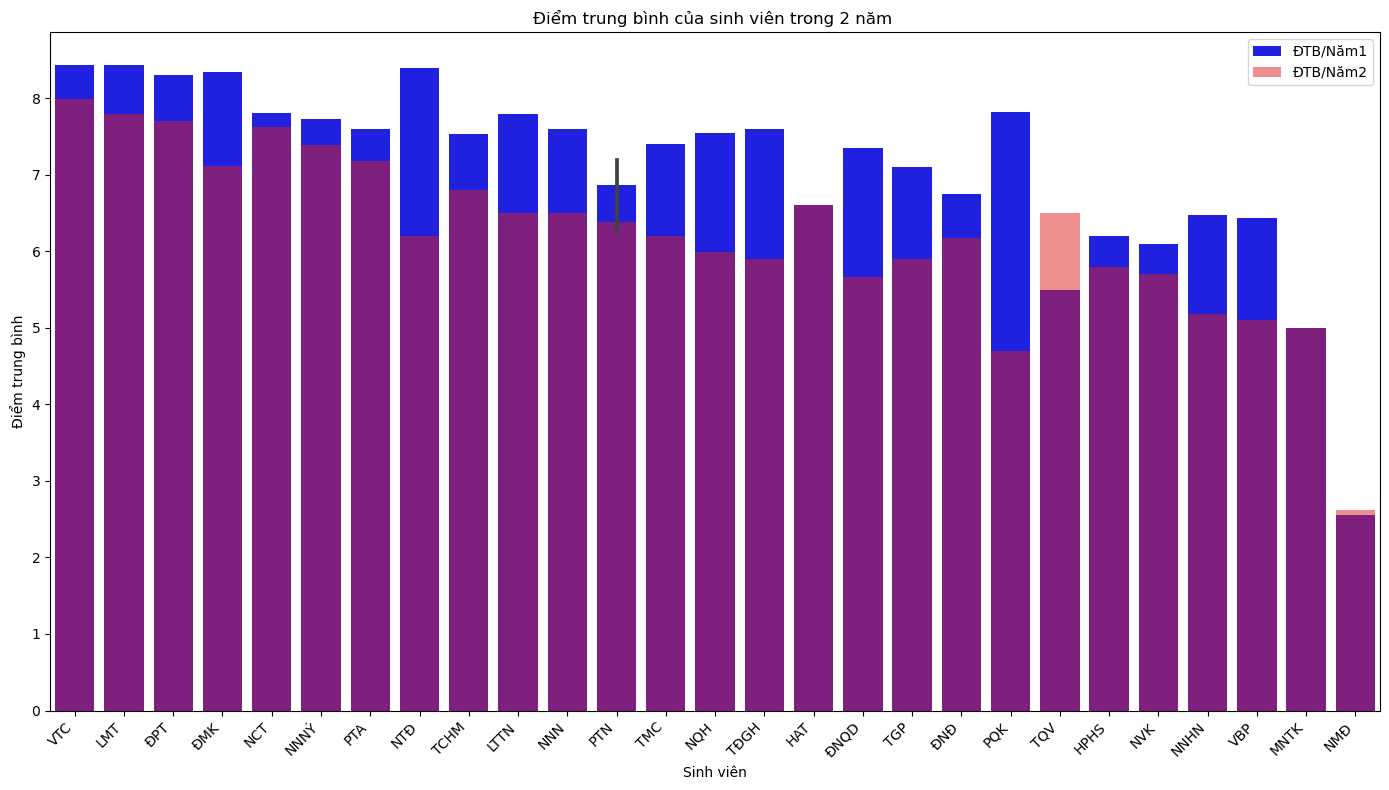

In [12]:

# T·∫°o c·ªôt m·ªõi ch·ª©a ƒëi·ªÉm trung b√¨nh
df_pd['ƒêTB_TrungBinh'] = (df_pd['ƒêTB/NƒÉm1'] + df_pd['ƒêTB/NƒÉm2']) / 2

# S·∫Øp x·∫øp l·∫°i DataFrame theo ƒëi·ªÉm trung b√¨nh
df_sorted = df_pd.sort_values(by='ƒêTB_TrungBinh', ascending=False)

# T·∫°o c·ªôt m·ªõi ch·ª©a t√™n vi·∫øt t·∫Øt c·ªßa sinh vi√™n
Ten_Viet_Tat = df_sorted['H·ªç v√† T√™n'].apply(lambda x: ''.join([word[0] for word in x.split()]))

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(14, 8))
sns.barplot(x=Ten_Viet_Tat, y='ƒêTB/NƒÉm1', data=df_sorted, color='blue', label='ƒêTB/NƒÉm1')
sns.barplot(x=Ten_Viet_Tat, y='ƒêTB/NƒÉm2', data=df_sorted, color='red', label='ƒêTB/NƒÉm2', alpha=0.5)
plt.title("ƒêi·ªÉm trung b√¨nh c·ªßa sinh vi√™n trong 2 nƒÉm ")
plt.xlabel("Sinh vi√™n")
plt.ylabel("ƒêi·ªÉm trung b√¨nh")
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# X√≥a c·ªôt m·ªõi
df_pd.drop(columns=['ƒêTB_TrungBinh'], inplace=True)


Trong bi·ªÉu ƒë·ªì n√†y, ch√∫ng ta th·∫•y r·∫±ng ƒëa s·ªë c√°c sinh vi√™n c√≥ ƒëi·ªÉm trung b√¨nh c·ªßa nƒÉm h·ªçc ƒë·∫ßu ti√™n (ƒêTB/NƒÉm1) cao h∆°n so v·ªõi nƒÉm h·ªçc th·ª© hai (ƒêTB/NƒÉm2). Ch·ªâ c√≥ hai sinh vi√™n c√≥ ƒëi·ªÉm trung b√¨nh c·ªßa nƒÉm h·ªçc th·ª© hai cao h∆°n so v·ªõi nƒÉm h·ªçc ƒë·∫ßu ti√™n. ƒêi·ªÅu n√†y cho th·∫•y m·ªôt xu h∆∞·ªõng chung l√† ƒëi·ªÉm s·ªë c·ªßa h·ªçc sinh trong l·ªõp th∆∞·ªùng cao h∆°n ·ªü nƒÉm h·ªçc ƒë·∫ßu ti√™n so v·ªõi nƒÉm h·ªçc sau.

M·ªôt ƒëi·ªÉm ƒë√°ng ch√∫ √Ω kh√°c l√† sinh vi√™n VTC c√≥ ƒëi·ªÉm trung b√¨nh cao nh·∫•t trong l·ªõp cho c·∫£ hai nƒÉm h·ªçc.


<h2>Ph√¢n lo·∫°i c·ªßa sinh vi√™n trong l·ªõp</h2>

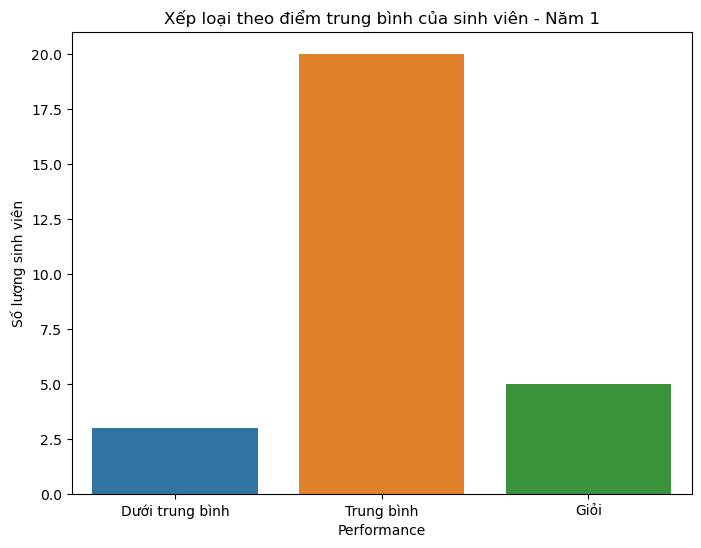

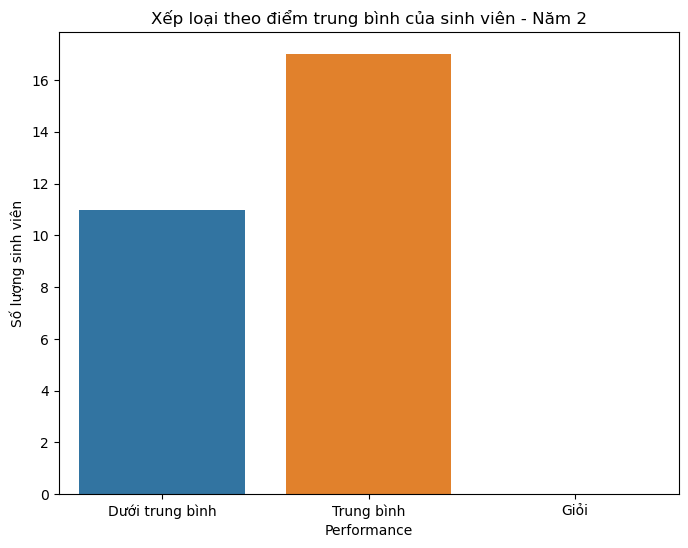

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# T·∫°o c·ªôt nh√£n d·ª±a tr√™n ƒëi·ªÉm trung b√¨nh
def label_performance(score):
    if score > 8:
        return "Gi·ªèi"
    elif score > 6:
        return "Trung b√¨nh"
    else:
        return "D∆∞·ªõi trung b√¨nh"

# T·∫°o c·ªôt nh√£n cho nƒÉm 1 v√† nƒÉm 2
df_pd['Lo·∫°i/NƒÉm1'] = df_pd['ƒêTB/NƒÉm1'].apply(label_performance)
df_pd['Lo·∫°i/NƒÉm2'] = df_pd['ƒêTB/NƒÉm2'].apply(label_performance)

# V·∫Ω countplot cho c·ªôt nh√£n Performance cho nƒÉm 1
plt.figure(figsize=(8, 6))
sns.countplot(x='Lo·∫°i/NƒÉm1', data=df_pd, order=['D∆∞·ªõi trung b√¨nh', 'Trung b√¨nh', 'Gi·ªèi'])
plt.title("X·∫øp lo·∫°i theo ƒëi·ªÉm trung b√¨nh c·ªßa sinh vi√™n - NƒÉm 1")
plt.xlabel("Performance")
plt.ylabel("S·ªë l∆∞·ª£ng sinh vi√™n")
plt.show()

# V·∫Ω countplot cho c·ªôt nh√£n Performance cho nƒÉm 2
plt.figure(figsize=(8, 6))
sns.countplot(x='Lo·∫°i/NƒÉm2', data=df_pd, order=['D∆∞·ªõi trung b√¨nh', 'Trung b√¨nh', 'Gi·ªèi'])
plt.title("X·∫øp lo·∫°i theo ƒëi·ªÉm trung b√¨nh c·ªßa sinh vi√™n - NƒÉm 2")
plt.xlabel("Performance")
plt.ylabel("S·ªë l∆∞·ª£ng sinh vi√™n")
plt.show()


Trong ph√¢n ph·ªëi x·∫øp lo·∫°i cho hai nƒÉm h·ªçc c·ªßa sinh vi√™n trong l·ªõp, ch√∫ng ta nh·∫≠n th·∫•y r·∫±ng ƒëa s·ªë c√°c b·∫°n t·∫≠p trung ·ªü m·ª©c x·∫øp lo·∫°i Trung b√¨nh, c√≥ nghƒ©a l√† ƒëi·ªÉm trung b√¨nh c·ªßa h·ªç n·∫±m trong kho·∫£ng t·ª´ 6 ƒë·∫øn d∆∞·ªõi 8. ƒêi·ªÅu n√†y cho th·∫•y r·∫±ng ph·∫ßn l·ªõn sinh vi√™n ƒë·ªÅu ƒë·∫°t ƒë∆∞·ª£c k·∫øt qu·∫£ h·ªçc t·∫≠p t∆∞∆°ng ƒë·ªëi ·ªïn ƒë·ªãnh, nh∆∞ng kh√¥ng ƒë·∫°t ƒë∆∞·ª£c m·ª©c ƒëi·ªÉm cao nh·∫•t.

M·ªôt ƒëi·ªÉm ƒë√°ng ch√∫ √Ω l√† bi·ªÉu ƒë·ªì c≈©ng cho th·∫•y s·ª± thay ƒë·ªïi trong ph√¢n ph·ªëi x·∫øp lo·∫°i gi·ªØa hai nƒÉm h·ªçc. Trong khi lo·∫°i Gi·ªèi kh√¥ng c√≤n xu·∫•t hi·ªán ·ªü nƒÉm th·ª© hai, th√¨ lo·∫°i D∆∞·ªõi trung b√¨nh l·∫°i tƒÉng l√™n ƒë√°ng k·ªÉ t·ª´ 3 sinh vi√™n l√™n ƒë·∫øn 11 sinh vi√™n. ƒêi·ªÅu n√†y c√≥ th·ªÉ ch·ªâ ra m·ªôt s·ª± suy gi·∫£m trong hi·ªáu su·∫•t h·ªçc t·∫≠p c·ªßa m·ªôt s·ªë sinh vi√™n, c√≥ th·ªÉ do nhi·ªÅu y·∫øu t·ªë nh∆∞ s·ª± thay ƒë·ªïi trong m√¥i tr∆∞·ªùng h·ªçc t·∫≠p, √°p l·ª±c h·ªçc t·∫≠p, ho·∫∑c s·ª± thay ƒë·ªïi trong c√°ch ti·∫øp c·∫≠n h·ªçc t·∫≠p.

In [14]:
count_gt_1 = df.filter((col("ƒêTB/NƒÉm2") - col("ƒêTB/NƒÉm1")) > 0.5).count()
count_lt_minus_1 = df.filter((col("ƒêTB/NƒÉm2") - col("ƒêTB/NƒÉm1")) < -1).count()
count_between_minus_1_and_1 = df.filter((col("ƒêTB/NƒÉm2") - col("ƒêTB/NƒÉm1")).between(-1, 0.4)).count()

print("S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 tƒÉng:", count_gt_1)
print("S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 gi·∫£m:", count_lt_minus_1)
print("S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 tƒÉng gi·∫£m kh√¥ng ƒë√°ng k·ªÉ:", count_between_minus_1_and_1)


S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 tƒÉng: 1
S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 gi·∫£m: 12
S·ªë sinh vi√™n c√≥ ƒêTB gi·ªØa nƒÉm 1 v√† nƒÉm 2 tƒÉng gi·∫£m kh√¥ng ƒë√°ng k·ªÉ: 15


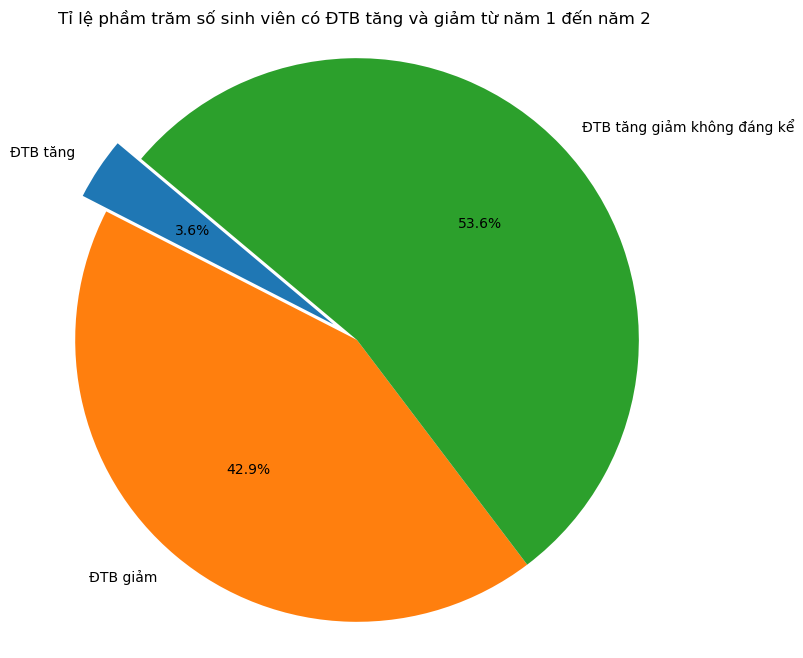

In [15]:
#pie plot
import matplotlib.pyplot as plt

# D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n t·ª´ tr∆∞·ªõc
counts = [count_gt_1, count_lt_minus_1, count_between_minus_1_and_1]
labels = ['ƒêTB tƒÉng', 'ƒêTB gi·∫£m', 'ƒêTB tƒÉng gi·∫£m kh√¥ng ƒë√°ng k·ªÉ']
explode = (0.1, 0, 0)  # T√°ch c√°c ph·∫ßn t·ª≠ ƒë·∫ßu ti√™n ra

# T·∫°o bi·ªÉu ƒë·ªì pie plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # ƒê·∫£m b·∫£o bi·ªÉu ƒë·ªì tr√≤n
plt.title('T·ªâ l·ªá ph·∫ßm trƒÉm s·ªë sinh vi√™n c√≥ ƒêTB tƒÉng v√† gi·∫£m t·ª´ nƒÉm 1 ƒë·∫øn nƒÉm 2 ')
plt.show()


Bi√™u ƒë·ªì cho th·∫•y :
   - ƒêTB nƒÉm 1 tƒÉng so v·ªõi nƒÉm 2 chi·∫øm : 3.6%
   - ƒêTB tƒÉng kh√¥ng ƒë√°ng k·ªÉ n·∫±m trong kho·∫£ng -1 ƒë·∫øn 0.4 chi·∫øm :53.6%
   - ƒêTB gi·∫£m chi·∫øm : 42.9%

In [16]:
count_duoi_5_n1 = df.filter(df["ƒêTB/NƒÉm1"] < 5).count()

# ƒê·∫øm s·ªë sinh vi√™n c√≥ ƒêTB/nƒÉm1 t·ª´ 5 ƒë·∫øn d∆∞·ªõi 7
count_tu_5_den_7_n1 = df.filter((df["ƒêTB/NƒÉm1"] >= 5) & (df["ƒêTB/NƒÉm1"] < 7)).count()

# ƒê·∫øm s·ªë sinh vi√™n c√≥ ƒêTB/nƒÉm1 tr√™n 7
count_tren_7_n1 = df.filter(df["ƒêTB/NƒÉm1"] > 7).count()


In [17]:
count_duoi_5_n2 = df.filter(df["ƒêTB/NƒÉm2"] < 5).count()

# ƒê·∫øm s·ªë sinh vi√™n c√≥ ƒêTB/nƒÉm1 t·ª´ 5 ƒë·∫øn d∆∞·ªõi 7
count_tu_5_den_7_n2 = df.filter((df["ƒêTB/NƒÉm2"] >= 5) & (df["ƒêTB/NƒÉm2"] < 7)).count()

# ƒê·∫øm s·ªë sinh vi√™n c√≥ ƒêTB/nƒÉm1 tr√™n 7
count_tren_7_n2 = df.filter(df["ƒêTB/NƒÉm2"] > 7).count()

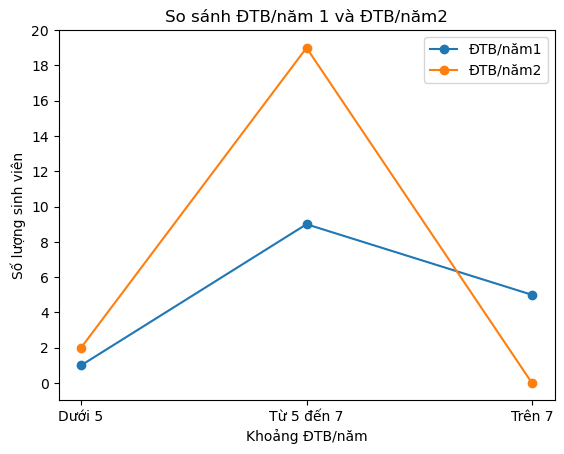

In [18]:
#LINE PLOT
import matplotlib.pyplot as plt


labels_1 = ['D∆∞·ªõi 5', 'T·ª´ 5 ƒë·∫øn 7', 'Tr√™n 7']
counts_1 = [count_duoi_5_n1, count_tu_5_den_7_n1, count_tren_7_n1]

labels_2 = ['D∆∞·ªõi 5', 'T·ª´ 5 ƒë·∫øn 7', 'Tr√™n 7']
counts_2 = [count_duoi_5_n2, count_tu_5_den_7_n2, count_tren_7_n2]

# V·∫Ω bi·ªÉu ƒë·ªì line plot
plt.plot(labels_1, counts_1, marker='o', linestyle='-', label='ƒêTB/nƒÉm1')
plt.plot(labels_2, counts_2, marker='o', linestyle='-', label='ƒêTB/nƒÉm2')

# ƒê·∫∑t ti√™u ƒë·ªÅ v√† nh√£n cho c√°c tr·ª•c
plt.title('So s√°nh ƒêTB/nƒÉm 1 v√† ƒêTB/nƒÉm2')
plt.xlabel('Kho·∫£ng ƒêTB/nƒÉm')
plt.ylabel('S·ªë l∆∞·ª£ng sinh vi√™n')
plt.yticks(range(0,21,2))

# Hi·ªÉn th·ªã ch√∫ th√≠ch
plt.legend()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


Bi·ªÉu ƒë·ªì cho th·∫•y ƒë∆∞·ª£c 2 gi√° tr·ªã ƒêi·ªÉm trung b√¨nh c·ªßa nƒÉm 1 v√† nƒÉm 2 c√≥ s·ª± kh√°c bi·ªát:
   - ·ªü ƒêTB/Nawm1 th√¨ t·ª´ 5 ƒë·∫øn 7 kh√° it tuy nhi√™n v·∫´n c√≥ v√†i b·∫°n tr√™n 7 v√† ch·ªâ c√≥ 1 b·∫°n d∆∞·ªõi 5
   - ·ªü ƒêTB/Nawm2 th√¨ ·ªü kho·∫£ng 5 ƒë·∫øn 7 c√≥ nhi·ªÅu b·∫°n h∆°n nhi·ªÅu so v·ªõi nƒÉm nh·∫•t, tuy nhi√™n kh√¥ng c√≥ ai tr√™n 7 v√† l·∫°i c√≥ th√™m 1 b·∫°n d∆∞·ªõi 5

<h2> Ph√¢n b·ªë ƒêi·ªÉm Trung B√¨nh c·ªßa l·ªõp</h2>

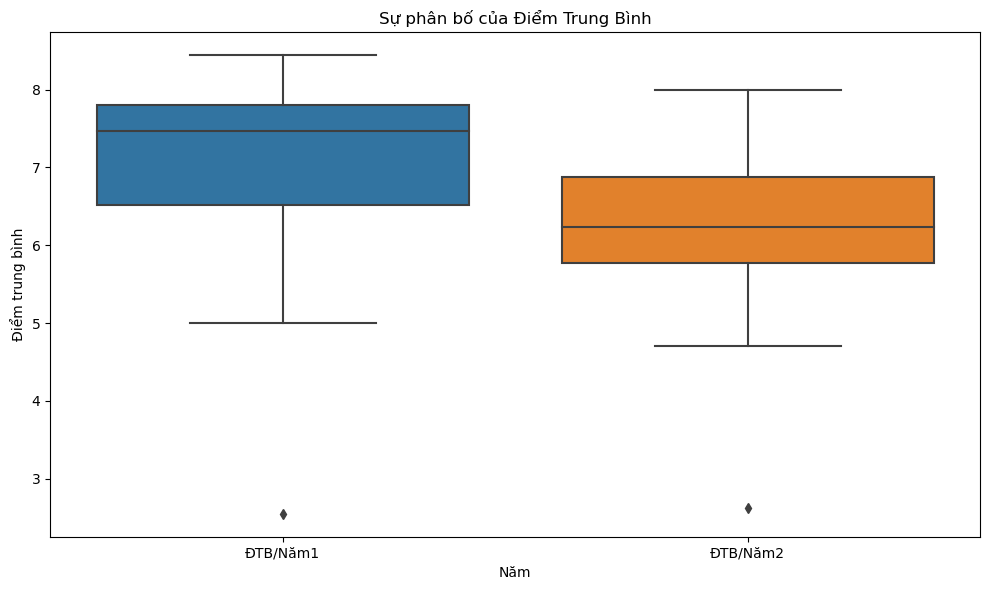

In [19]:
# V·∫Ω bi·ªÉu ƒë·ªì boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pd[['ƒêTB/NƒÉm1', 'ƒêTB/NƒÉm2']])
plt.title("S·ª± ph√¢n b·ªë c·ªßa ƒêi·ªÉm Trung B√¨nh")
plt.xlabel("NƒÉm")
plt.ylabel("ƒêi·ªÉm trung b√¨nh")
plt.tight_layout()

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()


T·ª© ph√¢n v·ªã l√† c√°c gi√° tr·ªã trong t·∫≠p d·ªØ li·ªáu chia th√†nh b·ªën ph·∫ßn b·∫±ng nhau, m·ªói ph·∫ßn chi·∫øm 25% t·ªïng s·ªë quan s√°t. Q1 (25%) l√† gi√° tr·ªã trung b√¨nh c·ªông c·ªßa d√£y s·ªë n·ª≠a d∆∞·ªõi c·ªßa h·ªôp (box), Q2 (50%) l√† gi√° tr·ªã trung b√¨nh c·ªông c·ªßa h·ªôp, v√† Q3 (75%) l√† gi√° tr·ªã trung b√¨nh c·ªông c·ªßa d√£y s·ªë n·ª≠a tr√™n c·ªßa h·ªôp.

Outliers l√† nh·ªØng gi√° tr·ªã thi·ªÉu s·ªë trong t·∫≠p d·ªØ li·ªáu, n·∫±m r·∫•t xa so v·ªõi c√°c gi√° tr·ªã ph·ªï bi·∫øn, c√≥ th·ªÉ l√† qu√° cao ho·∫∑c qu√° th·∫•p so v·ªõi ph√¢n ph·ªëi chung c·ªßa d·ªØ li·ªáu.

IQR  l√† ph·∫°m vi gi·ªØa Q1 v√† Q3, ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ h√¨nh th√†nh ra h·ªôp. N√≥ bi·ªÉu th·ªã s·ª± bi·∫øn ƒë·ªông c·ªßa d·ªØ li·ªáu trong m·ªôt ph·∫ßn trung t√¢m c·ªßa ph√¢n ph·ªëi v√† l√† m·ªôt ƒëo l∆∞·ªùng th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ x√°c ƒë·ªãnh outliers. Minimum v√† maximum trong boxplot th∆∞·ªùng ƒë∆∞·ª£c t√≠nh b·∫±ng Q1 tr·ª´ ƒëi 1.5 l·∫ßn IQR v√† Q3 c·ªông v·ªõi 1.5 l·∫ßn IQR t∆∞∆°ng ·ª©ng.







Trong box c·ªßa 'ƒêTB/NƒÉm1', ch√∫ng ta th·∫•y r·∫±ng:

- T·ª© ph√¢n v·ªã Q1 n·∫±m ·ªü kho·∫£ng 6.5 ƒëi·ªÉm, ƒë·∫°i di·ªán cho m·ª©c ƒëi·ªÉm d∆∞·ªõi trung b√¨nh c·ªßa ph√¢n ph·ªëi.
- T·ª© ph√¢n v·ªã Q2, ƒë·∫°i di·ªán cho median, n·∫±m trong kho·∫£ng gi√° tr·ªã trung b√¨nh x·∫•p x·ªâ 7.4 ƒëi·ªÉm.
- T·ª© ph√¢n v·ªã th·ª© 3 (Q3) n·∫±m trong kho·∫£ng g·∫ßn 8 ƒëi·ªÉm, ch·ªâ ra r·∫±ng c√≥ m·ªôt ph·∫ßn nh·ªè c√°c sinh vi√™n c√≥ ƒëi·ªÉm cao h∆°n trong nh√≥m n√†y.
- Max c·ªßa box n·∫±m tr√™n 8 ƒëi·ªÉm, ch·ªâ ra r·∫±ng c√≥ m·ªôt s·ªë sinh vi√™n c√≥ ƒëi·ªÉm r·∫•t cao trong nƒÉm ƒë·∫ßu ti√™n.
- Min l√† 5 ƒëi·ªÉm, ch·ªâ ra ƒëi·ªÉm th·∫•p nh·∫•t trong t·∫≠p d·ªØ li·ªáu.
- C√≥ m·ªôt outlier n·∫±m g·∫ßn 2 ƒëi·ªÉm, bi·ªÉu th·ªã cho m·ªôt gi√° tr·ªã r·∫•t th·∫•p v√† kh√¥ng ph√π h·ª£p v·ªõi ph√¢n ph·ªëi chung c·ªßa d·ªØ li·ªáu.

Trong box c·ªßa 'ƒêTB/NƒÉm2', ch√∫ng ta c≈©ng quan s√°t ƒë∆∞·ª£c:


- T·ª© ph√¢n v·ªã Q1 n·∫±m ·ªü kho·∫£ng 5.7 ƒëi·ªÉm, cho th·∫•y m·ªôt ph·∫ßn l·ªõn sinh vi√™n c√≥ ƒëi·ªÉm th·∫•p h∆°n so v·ªõi nƒÉm ƒë·∫ßu ti√™n.
- Median (Q2) n·∫±m trong kho·∫£ng 6.2 ƒëi·ªÉm, ch·ªâ ra ƒëi·ªÉm trung b√¨nh c·ªßa nh√≥m.
- T·ª© ph√¢n v·ªã th·ª© 3 (Q3) n·∫±m g·∫ßn 6.8 ƒëi·ªÉm, cho th·∫•y m·ªôt ph·∫ßn nh·ªè sinh vi√™n c√≥ ƒëi·ªÉm cao h∆°n.
- Max c·ªßa box n·∫±m g·∫ßn 8 ƒëi·ªÉm, bi·ªÉu th·ªã cho m·ªôt s·ªë sinh vi√™n c√≥ ƒëi·ªÉm cao trong nƒÉm th·ª© hai.
- Min d∆∞·ªõi 4.9 ƒëi·ªÉm, l√† ƒëi·ªÉm th·∫•p nh·∫•t trong t·∫≠p d·ªØ li·ªáu.
- C√≥ m·ªôt outlier n·∫±m g·∫ßn 2 ƒëi·ªÉm, cho th·∫•y m·ªôt gi√° tr·ªã r·∫•t th·∫•p v√† kh√¥ng ph√π h·ª£p v·ªõi ph√¢n ph·ªëi chung c·ªßa d·ªØ li·ªáu.

C√≥ s·ª± thay ƒë·ªïi ƒë√°ng k·ªÉ gi·ªØa ƒëi·ªÉm trung b√¨nh c·ªßa sinh vi√™n gi·ªØa hai nƒÉm h·ªçc. Trong khi ƒëi·ªÉm trung b√¨nh c·ªßa 'ƒêTB/NƒÉm1' t·∫≠p trung cao h∆°n v√† c√≥ ph·∫°m vi r·ªông h∆°n, ƒëi·ªÉm trung b√¨nh c·ªßa 'ƒêTB/NƒÉm2' th∆∞·ªùng th·∫•p h∆°n v√† c√≥ ph·∫°m vi h·∫πp h∆°n. ƒêi·ªÅu n√†y c√≥ th·ªÉ cho th·∫•y m·ªôt xu h∆∞·ªõng gi·∫£m ƒëi·ªÉm trung b√¨nh t·ª´ nƒÉm ƒë·∫ßu ti√™n ƒë·∫øn nƒÉm th·ª© hai.

<h2>Thu nh·∫≠p ·∫£nh h∆∞·ªüng ƒë·∫øn ƒëi·ªÉm trung b√¨nh </h2>

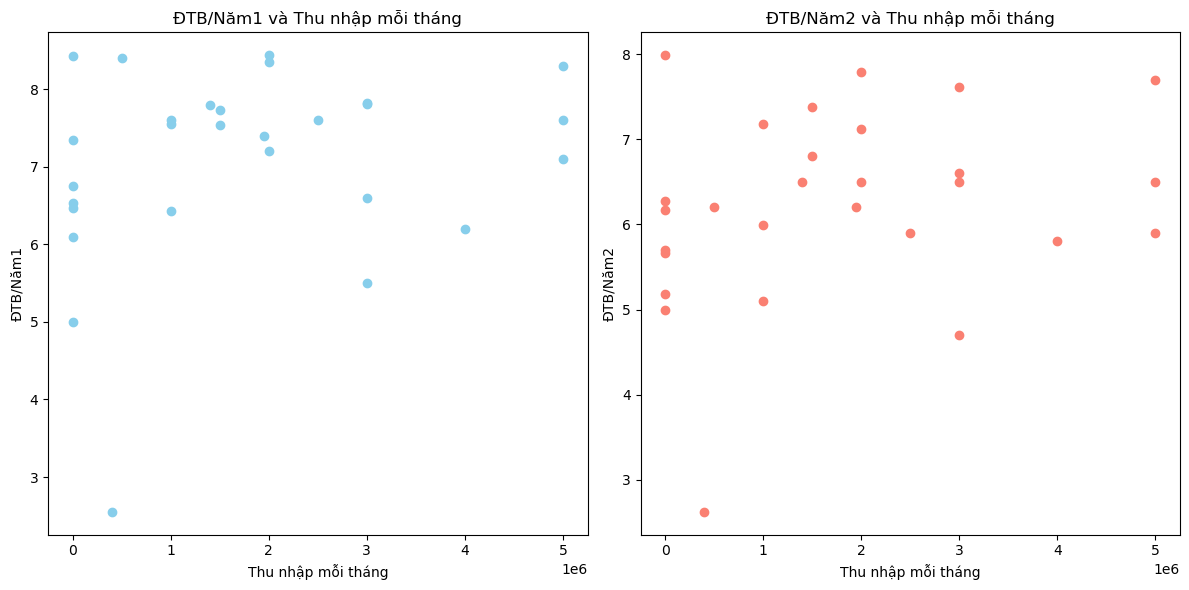

In [20]:
import matplotlib.pyplot as plt

# D·ªØ li·ªáu t·ª´ DataFrame
diem_tb_nam1 = df_pd['ƒêTB/NƒÉm1']
diem_tb_nam2 = df_pd['ƒêTB/NƒÉm2']
thu_nhap_moi_thang = df_pd['Thu nh·∫≠p m·ªói th√°ng']

# T·∫°o figure v√† axes cho hai bi·ªÉu ƒë·ªì
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bi·ªÉu ƒë·ªì scatter plot cho ƒêTB/NƒÉm1 v√† thu nh·∫≠p m·ªói th√°ng
axs[0].scatter(thu_nhap_moi_thang, diem_tb_nam1, color='skyblue')
axs[0].set_title('ƒêTB/NƒÉm1 v√† Thu nh·∫≠p m·ªói th√°ng')
axs[0].set_xlabel('Thu nh·∫≠p m·ªói th√°ng')
axs[0].set_ylabel('ƒêTB/NƒÉm1')

# Bi·ªÉu ƒë·ªì scatter plot cho ƒêTB/NƒÉm2 v√† thu nh·∫≠p m·ªói th√°ng
axs[1].scatter(thu_nhap_moi_thang, diem_tb_nam2, color='salmon')
axs[1].set_title('ƒêTB/NƒÉm2 v√† Thu nh·∫≠p m·ªói th√°ng')
axs[1].set_xlabel('Thu nh·∫≠p m·ªói th√°ng')
axs[1].set_ylabel('ƒêTB/NƒÉm2')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


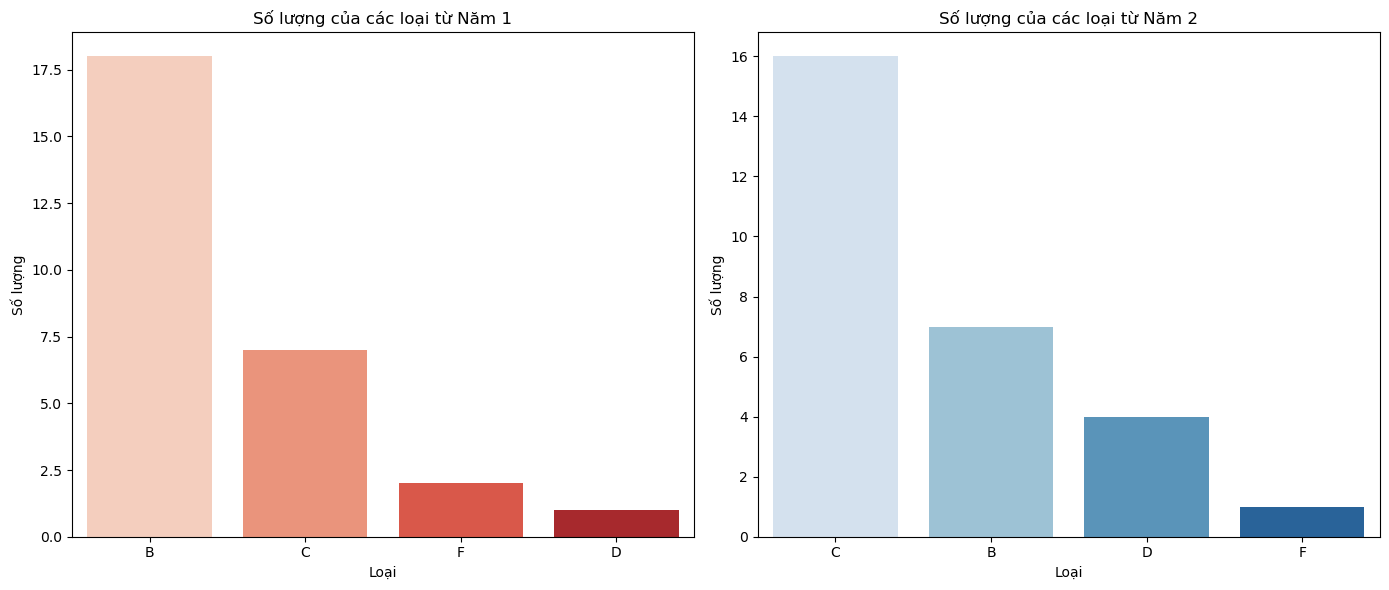

In [21]:
def label_performance(score):
    if score > 8.5 : 
        return "A"
    elif score <8.5 and score > 7:
        return "B"
    elif score <7 and score >5.5:
        return "C"
    elif score <5.5 and score > 4:
        return "D"
    else :
        return "F"

# √Åp d·ª•ng h√†m ƒë√°nh nh√£n hi·ªáu su·∫•t v√†o c·ªôt ƒêTB/NƒÉm1 v√† ƒêTB/NƒÉm2
df_pd['Lo·∫°i/NƒÉm1'] = df_pd['ƒêTB/NƒÉm1'].apply(label_performance)
df_pd['Lo·∫°i/NƒÉm2'] = df_pd['ƒêTB/NƒÉm2'].apply(label_performance)

# T·∫°o subplot
plt.figure(figsize=(14, 6))

# Subplot cho nƒÉm 1
plt.subplot(1, 2, 1)
sns.countplot(x=df_pd['Lo·∫°i/NƒÉm1'],order=df_pd['Lo·∫°i/NƒÉm1'].value_counts().index, palette='Reds')
plt.xlabel('Lo·∫°i')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('S·ªë l∆∞·ª£ng c·ªßa c√°c lo·∫°i t·ª´ NƒÉm 1')

# Subplot cho nƒÉm 2
plt.subplot(1, 2, 2)
sns.countplot(x=df_pd['Lo·∫°i/NƒÉm2'],order=df_pd['Lo·∫°i/NƒÉm2'].value_counts().index, palette='Blues')
plt.xlabel('Lo·∫°i')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('S·ªë l∆∞·ª£ng c·ªßa c√°c lo·∫°i t·ª´ NƒÉm 2')

plt.tight_layout()
plt.show()


<h2>Linear Regression(H·ªìi quy tuy·∫øn t√≠nh) </h2>

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon $

In [22]:
from sklearn.linear_model import LinearRegression

# Ch·ªçn c√°c bi·∫øn ƒë·ªôc l·∫≠p v√† bi·∫øn ph·ª• thu·ªôc
X = df_pd[['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)']]
y = df_pd['ƒêTB/NƒÉm1']

model = LinearRegression()

# Fit m√¥ h√¨nh v√†o d·ªØ li·ªáu
model.fit(X, y)

# In ra c√°c h·ªá s·ªë h·ªìi quy v√† h·ªá s·ªë ch·∫∑n
print('H·ªá s·ªë h·ªìi quy:', model.coef_)
print('H·ªá s·ªë ch·∫∑n:', model.intercept_)


H·ªá s·ªë h·ªìi quy: [-0.04336368]
H·ªá s·ªë ch·∫∑n: 7.637332411982222


  - H·ªá s·ªë h·ªìi quy:  -0.04336368.Trong tr∆∞·ªùng h·ª£p n√†y,v·ªõi m·ªói ƒë∆°n v·ªã tƒÉng trong kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng, ƒëi·ªÉm trung b√¨nh c·ªßa sinh vi√™n trong nƒÉm h·ªçc s·∫Ω gi·∫£m ƒëi kho·∫£ng 0.04336368 ƒëi·ªÉm.
 - H·ªá s·ªë ch·∫∑n : 7.637332411982222.Trong tr∆∞·ªùng h·ª£p n√†y, c√≥ th·ªÉ hi·ªÉu l√† khi kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng l√† 0 (t·ª©c l√† sinh vi√™n s·ªëng ngay g·∫ßn tr∆∞·ªùng), ƒëi·ªÉm trung b√¨nh c·ªßa sinh vi√™n trong nƒÉm h·ªçc s·∫Ω c√≥ gi√° tr·ªã g·∫ßn b·∫±ng 7.64.

<h2>S·ª± ·∫£nh h∆∞·ªüng t·ªõi ƒêTB/NƒÉm1 c·ªßa kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng</h2>

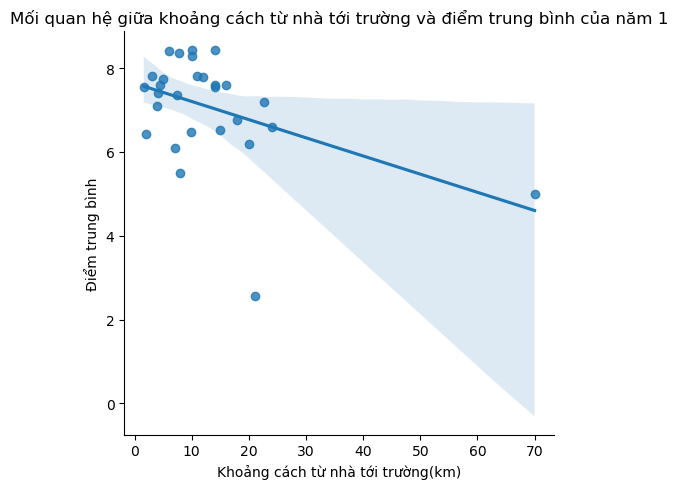

In [23]:
# V·∫Ω lmplot
sns.lmplot(x='Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)', y='ƒêTB/NƒÉm1', data=df_pd)

# ƒê·∫∑t ti√™u ƒë·ªÅ v√† nh√£n tr·ª•c
plt.title("M·ªëi quan h·ªá gi·ªØa kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng v√† ƒëi·ªÉm trung b√¨nh c·ªßa nƒÉm 1")
plt.xlabel("Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)")
plt.ylabel("ƒêi·ªÉm trung b√¨nh")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


Bi·ªÉu ƒë·ªì n√†y cho th·∫•y ƒë∆∞·ªùng h·ªìi quy ƒëang theo chi·ªÅu xu·ªëng, ƒëi·ªÅu n√†y c√≥ nghƒ©a l√† khi gi√° tr·ªã ƒë·ªôc l·∫≠p (Kho·∫£ng c√°c t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)) tƒÉng, th√¨ ƒêi·ªÉm Trung B√¨nh s·∫Ω c√≥ xu h∆∞·ªõng gi·∫£m v√† c·ª• th·ªÉ l√† 0.04336368
v√† kho·∫£ng tin c·∫≠y h·∫πp ch·ª©ng t·ªè l√† ·ªü ƒë√≥ c√≥ ƒë·ªô tin c·∫≠y cao v√† ƒë·ªô ch√≠nh x√°c cao. 

<h2>ƒê·ªô ch√™nh l·ªách c·ªßa S·ªë b·∫°n th√¢n trong l·ªõp</h2>

ƒê·ªÉ t√≠nh to√°n skewness c·ªßa s·ªë b·∫°n th√¢n trong l·ªõp, ch√∫ng ta c·∫ßn t√≠nh mean (ùúá), standard deviation (œÉ), v√† sau ƒë√≥ s·ª≠ d·ª•ng c√¥ng th·ª©c skewness
<h3>T√≠nh mean($\mu$)
$
\mu = \frac{\sum_{i=1}^{n} x_i}{n}
$,
T√≠nh standard deviation($\sigma$)
$
\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}
$
</h3>

<h3>
Sau khi c√≥ mean v√† standard deviation r·ªìi th·∫ø v√†o c√¥ng th·ª©c :
    $\text{Skewness} = \frac{\sum_{i=1}^{n} (x_i - \mu)^3 / n}{\sigma^3}$
</h3>


In [24]:
from scipy.stats import skew
skewness = skew(df_pd['S·ªë b·∫°n th√¢n trong l·ªõp'], bias=False)

print("skewness c·ªßa S·ªë b·∫°n th√¢n trong l·ªõp", skewness)

skewness c·ªßa S·ªë b·∫°n th√¢n trong l·ªõp 1.8369043250320987


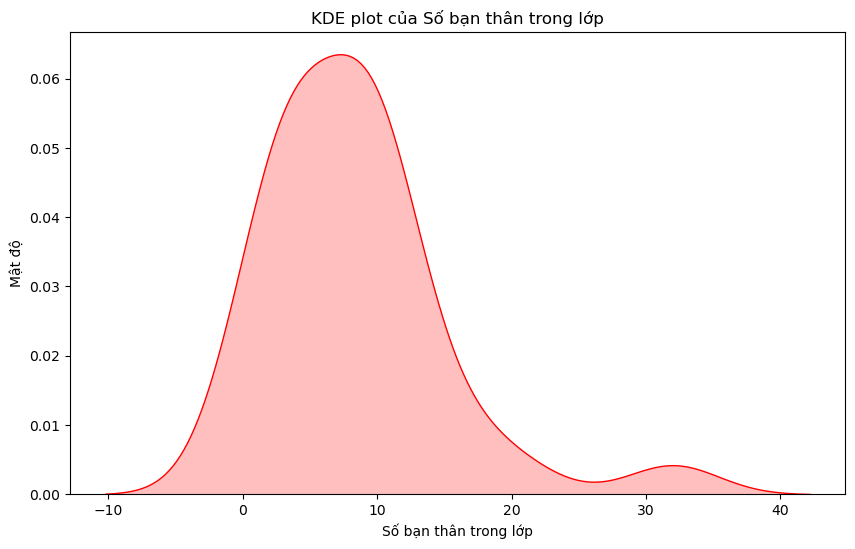

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_pd['S·ªë b·∫°n th√¢n trong l·ªõp'], color='red', shade=True)
plt.title('KDE plot c·ªßa S·ªë b·∫°n th√¢n trong l·ªõp')
plt.xlabel('S·ªë b·∫°n th√¢n trong l·ªõp')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.show()

Bi·ªÉu ƒë·ªì cho th·∫•y r·∫±ng h·∫ßu h·∫øt c√°c quan s√°t v·ªÅ ph√¢n b·ªë t·∫≠p trung ·ªü b√™n tr√°i c·ªßa gi√° tr·ªã trung b√¨nh, trong tr∆∞·ªùng h·ª£p n√†y l√† kho·∫£ng 10 s·ªë b·∫°n th√¢n trong l·ªõp. Tuy nhi√™n, c≈©ng c√≥ m·ªôt s·ªë √≠t c√° nh√¢n c√≥ s·ªë l∆∞·ª£ng b·∫°n th√¢n l·ªõn h∆°n v√† nh·ªè 10.

<h2>H·ªá s·ªë bi·∫øn thi√™n c·ªßa ƒêTB/NƒÉm1</h2>

$ CV = \frac{\text{ƒê·ªô l·ªách chu·∫©n}}{\text{Gi√° tr·ªã trung b√¨nh}} \times 100 $

In [26]:
# T√≠nh h·ªá s·ªë bi·∫øn thi√™n c·ªßa c·ªôt 'ƒêTB/NƒÉm1'
CV = df_pd['ƒêTB/NƒÉm1'].std() / df_pd['ƒêTB/NƒÉm1'].mean() * 100

print("H·ªá s·ªë bi·∫øn thi√™n c·ªßa c·ªôt 'ƒêTB/NƒÉm1': {:.2f}%".format(CV))


H·ªá s·ªë bi·∫øn thi√™n c·ªßa c·ªôt 'ƒêTB/NƒÉm1': 17.72%


H·ªá s·ªë bi·∫øn thi√™n th·ªÉ hi·ªán t·ª∑ l·ªá ph·∫ßn trƒÉm c·ªßa ƒë·ªô bi·∫øn ƒë·ªông t∆∞∆°ng ƒë·ªëi c·ªßa d·ªØ li·ªáu so v·ªõi gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt 'ƒêTB/NƒÉm1'. Trong tr∆∞·ªùng h·ª£p n√†y, gi√° tr·ªã c·ªßa CV l√† 17.72%, c√≥ nghƒ©a l√† ƒë·ªô bi·∫øn ƒë·ªông c·ªßa 'ƒêTB/NƒÉm1' chi·∫øm kho·∫£ng 17.72% so v·ªõi gi√° tr·ªã trung b√¨nh c·ªßa 'ƒêTB/NƒÉm1'.



<h2>Ph√¢n ph·ªëi ƒëi·ªÉm trung b√¨nh c·ªßa 2 h·ªçc k√¨ </h2>

In [27]:

df_pd['ƒêTB_TrungBinh'] = (df_pd['ƒêTB/NƒÉm1'] + df_pd['ƒêTB/NƒÉm2']) / 2

# T√≠nh mean (trung b√¨nh)
mean = np.mean(df_pd['ƒêTB_TrungBinh'])

# T√≠nh median (trung v·ªã)
median = np.median(df_pd['ƒêTB_TrungBinh'])

# T√≠nh mode (tr·ªã s·ªë xu·∫•t hi·ªán nhi·ªÅu nh·∫•t)
mode = stats.mode(df_pd['ƒêTB_TrungBinh'])

print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)


Mean: 6.656428571428572
Median: 6.76
Mode: ModeResult(mode=array([6.]), count=array([2]))


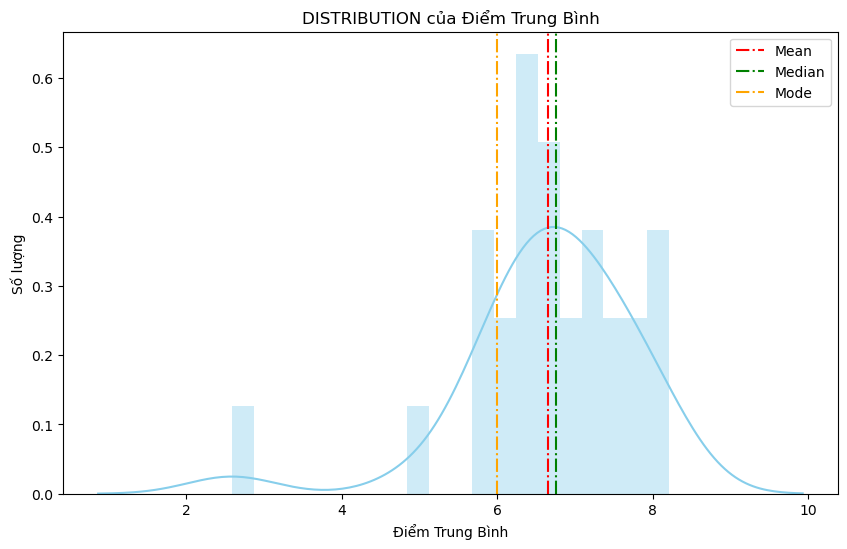

In [28]:

# T·∫°o histogram
plt.figure(figsize=(10, 6))
sns.distplot(df_pd['ƒêTB_TrungBinh'], bins=20, kde=True, color='skyblue')

# V·∫Ω ƒë∆∞·ªùng ph√¢n ph·ªëi trung b√¨nh
plt.axvline(x=mean, color='red', linestyle='-.', label='Mean')
plt.axvline(x=median, color='green', linestyle='-.', label='Median')
plt.axvline(x=mode.mode[0], color='orange', linestyle='-.', label='Mode')

# Th√™m ch√∫ th√≠ch v√† ti√™u ƒë·ªÅ
plt.legend()
plt.xlabel('ƒêi·ªÉm Trung B√¨nh')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.title('DISTRIBUTION c·ªßa ƒêi·ªÉm Trung B√¨nh')

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.show()
df_pd.drop(columns=['ƒêTB_TrungBinh'], inplace=True)


Mode : Mode l√† gi√° tr·ªã xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong d·ªØ li·ªáu. Trong tr∆∞·ªùng h·ª£p n√†y, mode ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† 6, t·ª©c l√† 6 l√† gi√° tr·ªã xu·∫•t hi·ªán nhi·ªÅu nh·∫•t trong t·∫≠p d·ªØ li·ªáu.

Mean (trung b√¨nh): L√† t·ªïng c·ªßa t·∫•t c·∫£ c√°c gi√° tr·ªã trong d·ªØ li·ªáu chia cho s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã. Mean ƒë∆∞·ª£c t√≠nh l√† kho·∫£ng 6.7.

Median (trung v·ªã): L√† gi√° tr·ªã ·ªü v·ªã tr√≠ gi·ªØa c·ªßa d√£y s·ªë ƒë√£ ƒë∆∞·ª£c s·∫Øp x·∫øp theo th·ª© t·ª± tƒÉng d·∫ßn. Trong tr∆∞·ªùng h·ª£p n√†y, median ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† kho·∫£ng 6.6.

Trong tr∆∞·ªùng h·ª£p ph√¢n ph·ªëi d·ªØ li·ªáu kh√¥ng ƒë·ªëi x·ª©ng, mean th∆∞·ªùng b·ªã ·∫£nh h∆∞·ªüng b·ªüi c√°c gi√° tr·ªã outliers


<h2> S·ª± t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn </h2>

Text(0.5, 1.0, 'S·ª± t∆∞∆°ng quan gi·ªØa c√°c gi√° tr·ªã')

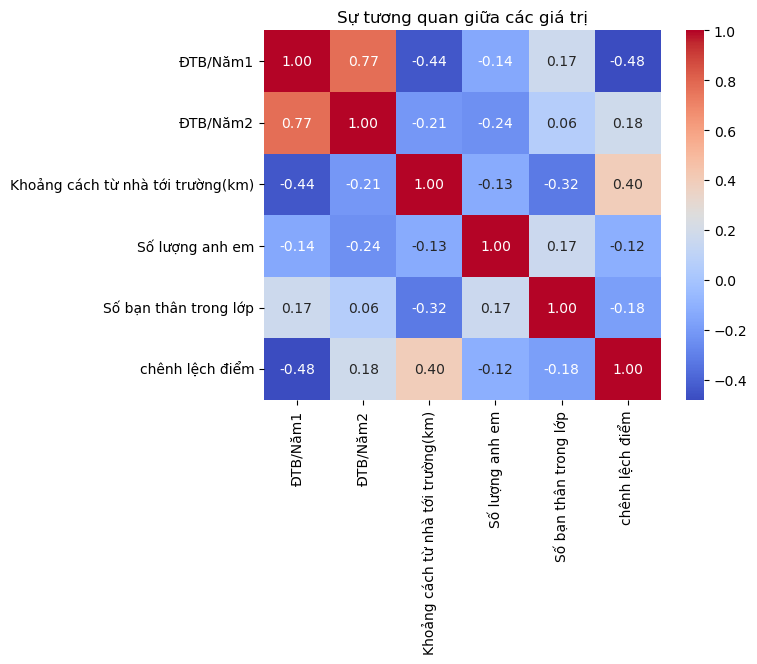

In [29]:
df_pd['ch√™nh l·ªách ƒëi·ªÉm'] = (df_pd['ƒêTB/NƒÉm2'] - df_pd['ƒêTB/NƒÉm1'])
df_selected = df_pd[['ƒêTB/NƒÉm1','ƒêTB/NƒÉm2','Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)','S·ªë l∆∞·ª£ng anh em','S·ªë b·∫°n th√¢n trong l·ªõp','ch√™nh l·ªách ƒëi·ªÉm']]
corr = df_selected.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("S·ª± t∆∞∆°ng quan gi·ªØa c√°c gi√° tr·ªã")

    ƒêTB/NƒÉm1 v√† ƒêTB/NƒÉm2: C√≥ m·ªôt m·ªëi t∆∞∆°ng quan d∆∞∆°ng m·∫°nh (0.77) gi·ªØa ƒëi·ªÉm trung b√¨nh nƒÉm th·ª© nh·∫•t v√† ƒëi·ªÉm trung b√¨nh nƒÉm th·ª© hai. ƒêi·ªÅu n√†y ng·ª• √Ω r·∫±ng h·ªçc sinh c√≥ xu h∆∞·ªõng duy tr√¨ ho·∫∑c c·∫£i thi·ªán ƒëi·ªÉm s·ªë c·ªßa h·ªç t·ª´ nƒÉm ƒë·∫ßu ti√™n ƒë·∫øn nƒÉm th·ª© hai.

    Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng v√† ƒêTB/NƒÉm1: C√≥ m·ªôt t∆∞∆°ng quan ti√™u c·ª±c (kho·∫£ng -0.44) gi·ªØa kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng v√† ƒëi·ªÉm trung b√¨nh nƒÉm th·ª© nh·∫•t. ƒêi·ªÅu n√†y c√≥ th·ªÉ ng·ª• √Ω r·∫±ng sinh vi√™n c√≥ th·ªÉ g·∫∑p kh√≥ khƒÉn trong vi·ªác duy tr√¨ hi·ªáu su·∫•t h·ªçc t·∫≠p khi ph·∫£i di chuy·ªÉn xa t·ª´ nh√† t·ªõi tr∆∞·ªùng.

    S·ªë l∆∞·ª£ng anh em v√† S·ªë b·∫°n th√¢n trong l·ªõp: C√≥ m·ªôt m·ªëi t∆∞∆°ng quan ƒë√°ng k·ªÉ (0.50) gi·ªØa s·ªë l∆∞·ª£ng anh em v√† s·ªë b·∫°n th√¢n trong l·ªõp. ƒêi·ªÅu n√†y c√≥ th·ªÉ ng·ª• √Ω r·∫±ng sinh vi√™n c√≥ nhi·ªÅu anh em c√≥ th·ªÉ d·ªÖ d√†ng h√≤a ƒë·ªìng v√† c√≥ nhi·ªÅu b·∫°n trong l·ªõp.

    Ch√™nh l·ªách ƒëi·ªÉm v√† kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng: C√≥ m·ªôt t∆∞∆°ng quan ƒë√°ng ch√∫ √Ω (0.40) gi·ªØa ch√™nh l·ªách ƒëi·ªÉm v√† kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng. C√≥ nghƒ©a l√† khi kho·∫£ng c√°ch c√†ng tƒÉng th√¨ ch√™nh l·ªách gi·ªØa ƒëi·ªÉm trung b√¨nh nƒÉm 1 v√† nƒÉm 2 c≈©ng tƒÉng theo

<h2>ƒêTB/NƒÉm1 c·ªßa t·ª´ng sinh vi√™n</h2>

In [30]:
# Layouts

# Chuy·ªÉn ƒë·ªïi ki·ªÉu d·ªØ li·ªáu c·ªßa c·ªôt 'ƒêTB/NƒÉm1'sang ki·ªÉu float
df = df.withColumn("ƒêTB/NƒÉm1", df["ƒêTB/NƒÉm1"].cast("float"))

# Ch·ªçn c√°c c·ªôt 'MSSV', 'ƒêTB/NƒÉm1'
df1 = df.select('MSSV', 'ƒêTB/NƒÉm1').toPandas()
# L·∫•y hai s·ªë cu·ªëi c·ªßa c·ªôt MSSV
df1['MSSV'] = df1['MSSV'].str[-3:]
# Output v√†o notebook
output_notebook()

# Kh·ªüi t·∫°o c√°c ƒë·ªëi t∆∞·ª£ng figure cho t·ª´ng subplot
fig1 = figure(width=300, height=300, title="ƒêTB/NƒÉm1 d∆∞·ªõi 6")
fig2 = figure(width=300, height=300, title="ƒêTB/NƒÉm1 tr√™n 6 v√† d∆∞·ªõi 8")
fig3 = figure(width=300, height=300, title="ƒêTB/NƒÉm1 tr√™n 8")

df_under_6= df1[df1['ƒêTB/NƒÉm1'] < 6]
fig1.circle(df_under_6['MSSV'], df_under_6['ƒêTB/NƒÉm1'], size=8, color='blue', alpha=0.5)

df_over_6_under_8 = df1[(df1['ƒêTB/NƒÉm1'] >= 6) & (df1['ƒêTB/NƒÉm1'] < 8)]
fig2.circle(df_over_6_under_8['MSSV'], df_over_6_under_8['ƒêTB/NƒÉm1'], size=8, color='green', alpha=0.5)

df_over_8= df1[df1['ƒêTB/NƒÉm1'] >= 8]
fig3.circle(df_over_8['MSSV'], df_over_8['ƒêTB/NƒÉm1'], size=8, color='red', alpha=0.5)

# T·∫°o m·ªôt row layout
row_layout = row(fig1, fig2, fig3)
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
show(row_layout)


Loading BokehJS ...

<h2>ƒêTB c·∫£ 2 nƒÉm c·ªßa t·ª´ng sinh vi√™n</h2>

In [36]:


# Ch·ªçn c√°c c·ªôt 'MSSV', 'ƒêTB/NƒÉm1'
df1 = df_pd[['MSSV', 'ƒêTB/NƒÉm1', 'ƒêTB/NƒÉm2', 'Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)']]
# L·∫•y hai s·ªë cu·ªëi c·ªßa c·ªôt MSSV
# Output v√†o notebook
output_notebook()
df1['ƒêTB'] = (df1['ƒêTB/NƒÉm1'] + df1['ƒêTB/NƒÉm2']) / 2
# Kh·ªüi t·∫°o c√°c ƒë·ªëi t∆∞·ª£ng figure cho t·ª´ng subplot
fig1 = figure(width=300, height=300, title="ƒêTB c·∫£ 2 nƒÉm d∆∞·ªõi 6")
fig2 = figure(width=300, height=300, title="ƒêTB c·∫£ 2 nƒÉm tr√™n 6 v√† d∆∞·ªõi 8")
fig3 = figure(width=300, height=300, title="ƒêTB c·∫£ 2 nƒÉm tr√™n 8")

df_under_6= df1[df1['ƒêTB'] < 6]
fig1.circle(df_under_6['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)'], df_under_6['ƒêTB'], size=8, color='blue', alpha=0.5)

df_over_6_under_8 = df1[(df1['ƒêTB'] >= 6) & (df1['ƒêTB'] < 8)]
fig2.circle(df_over_6_under_8['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)'], df_over_6_under_8['ƒêTB'], size=8, color='green', alpha=0.5)

df_over_8= df1[df1['ƒêTB'] >= 8]
fig3.circle(df_over_8['Kho·∫£ng c√°ch t·ª´ nh√† t·ªõi tr∆∞·ªùng(km)'], df_over_8['ƒêTB'], size=8, color='red', alpha=0.5)

# T·∫°o m·ªôt row layout
row_layout = row(fig1, fig2, fig3)
# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
show(row_layout)


Loading BokehJS ...

/tmp/ipykernel_54/3462422900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ƒêTB'] = (df1['ƒêTB/NƒÉm1'] + df1['ƒêTB/NƒÉm2']) / 2


In [34]:
# Hide click policy, Hovel tool, Tab panel


# Ch·ªçn c√°c c·ªôt 'MSSV', 'ƒêTB/NƒÉm1', 'ƒêTB/NƒÉm2'
df1 = df_pd[['MSSV','S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm1', 'ƒêTB/NƒÉm2']]
# Output v√†o notebook
output_notebook()

# T·∫°o ƒë·ªëi t∆∞·ª£ng figure cho ƒêTB/NƒÉm1
fig1 = figure(width=600, height=400, title="ƒêi·ªÉm Trung B√¨nh theo s·ªë b·∫°n th√¢n trong l·ªõp (NƒÉm 1)",
           x_axis_label='S·ªë b·∫°n th√¢n trong l·ªõp', y_axis_label='ƒêTB/NƒÉm1')
# L·ªçc d·ªØ li·ªáu d∆∞·ªõi 6
df_under_6_1 = df1[df1['ƒêTB/NƒÉm1'] < 6]
source_under_6_1 = ColumnDataSource(df_under_6_1)
fig1.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm1', size=8, color='blue', alpha=0.5, legend_label='D∆∞·ªõi 6', source=source_under_6_1)
# L·ªçc d·ªØ li·ªáu tr√™n 6 v√† d∆∞·ªõi 8
df_over_6_under_8_1 = df1[(df1['ƒêTB/NƒÉm1'] >= 6) & (df1['ƒêTB/NƒÉm1'] < 8)]
source_over_6_under_8_1 = ColumnDataSource(df_over_6_under_8_1)
fig1.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm1', size=8, color='green', alpha=0.5, legend_label='Tr√™n 6 v√† D∆∞·ªõi 8', source=source_over_6_under_8_1)
# L·ªçc d·ªØ li·ªáu tr√™n 8
df_over_8_1 = df1[df1['ƒêTB/NƒÉm1'] >= 8]
source_over_8_1 = ColumnDataSource(df_over_8_1)
fig1.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm1', size=8, color='red', alpha=0.5, legend_label='Tr√™n 8', source=source_over_8_1)
# T·∫°o hover tool v√† ch·ªâ ƒë·ªãnh th√¥ng tin khi di chu·ªôt qua cho ƒêTB/NƒÉm1
hover1 = HoverTool(tooltips=[('MSSV', '@MSSV'),
                             ('ƒêTB/NƒÉm1', '@{ƒêTB/NƒÉm1}'),
                            ('S·ªë b·∫°n th√¢n trong l·ªõp','@{S·ªë b·∫°n th√¢n trong l·ªõp}')],
                             mode='vline')
fig1.add_tools(hover1)
fig1.legend.click_policy = "hide"

# T·∫°o ƒë·ªëi t∆∞·ª£ng figure cho ƒêTB/NƒÉm2
fig2 = figure(width=600, height=400, title="ƒêi·ªÉm Trung B√¨nh theo s·ªë b·∫°n th√¢n trong l·ªõp (NƒÉm 2)",
           x_axis_label='S·ªë b·∫°n th√¢n trong l·ªõp', y_axis_label='ƒêTB/NƒÉm2')
# L·ªçc d·ªØ li·ªáu d∆∞·ªõi 6 cho ƒêTB/NƒÉm2
df1['ƒêTB/NƒÉm2'] = pd.to_numeric(df1['ƒêTB/NƒÉm2'], errors='coerce')
df_under_6_2 = df1[df1['ƒêTB/NƒÉm2'] < 6]
source_under_6_2 = ColumnDataSource(df_under_6_2)
fig2.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm2', size=8, color='blue', alpha=0.5, legend_label='D∆∞·ªõi 6', source=source_under_6_2)
# L·ªçc d·ªØ li·ªáu tr√™n 6 v√† d∆∞·ªõi 8 cho ƒêTB/NƒÉm2
df_over_6_under_8_2 = df1[(df1['ƒêTB/NƒÉm2'] >= 6) & (df1['ƒêTB/NƒÉm2'] < 8)]
source_over_6_under_8_2 = ColumnDataSource(df_over_6_under_8_2)
fig2.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm2', size=8, color='green', alpha=0.5, legend_label='Tr√™n 6 v√† D∆∞·ªõi 8', source=source_over_6_under_8_2)
# L·ªçc d·ªØ li·ªáu tr√™n 8 cho ƒêTB/NƒÉm2
df_over_8_2 = df1[df1['ƒêTB/NƒÉm2'] >= 8]
source_over_8_2 = ColumnDataSource(df_over_8_2)
fig2.circle('S·ªë b·∫°n th√¢n trong l·ªõp', 'ƒêTB/NƒÉm2', size=8, color='red', alpha=0.5, legend_label='Tr√™n 8', source=source_over_8_2)
# T·∫°o hover tool v√† ch·ªâ ƒë·ªãnh th√¥ng tin khi di chu·ªôt qua cho ƒêTB/NƒÉm2
hover2 = HoverTool(tooltips=[('MSSV', '@MSSV'),
                             ('ƒêTB/NƒÉm2', '@{ƒêTB/NƒÉm2}'),
                            ('S·ªë b·∫°n th√¢n trong l·ªõp','@{S·ªë b·∫°n th√¢n trong l·ªõp}')],
                             mode='vline')
fig2.add_tools(hover2)
fig2.legend.click_policy = "hide"

# T·∫°o tab panel
tab1 = Panel(child=fig1, title="NƒÉm 1")
tab2 = Panel(child=fig2, title="NƒÉm 2")
tabs = Tabs(tabs=[tab1, tab2])

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
show(tabs)


Loading BokehJS ...

/tmp/ipykernel_54/3863355492.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ƒêTB/NƒÉm2'] = pd.to_numeric(df1['ƒêTB/NƒÉm2'], errors='coerce')
